# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
"""
I don't know much about Ann Arbor.  So I want to look at precipitation for 
one of its rain gauges.  To ensure it is working correctly, I want to compare it
to another Ann Arbor rain gauge to see if the values are similar.  Then, I want to
see how Ann Arbor's average monthly rainfall compares to all of Michigan's.  If
it is less, I may want to visit Ann Arbor.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df_bp = pd.read_csv('BartonPondRainGaugeData.csv')

df_jr = pd.read_csv('JacksonRoadRainGaugeData.csv')

df_bp.head(10)

,Reading Date,Rainfall (in.)
0,01/01/2010,0.00
1,01/02/2010,0.00
2,01/03/2010,0.00
3,01/04/2010,0.00
4,01/05/2010,0.00
5,01/06/2010,0.00
6,01/07/2010,0.19
7,01/08/2010,0.01
8,01/09/2010,0.00
9,01/10/2010,0.00


In [2]:
"""
Merge the datasets using an inner type join so that I have the same dates in
both sets.
"""

df_merge = pd.merge(df_bp, df_jr, how='inner', on='Reading Date',
                   suffixes=('_bp', '_jr'))
print(df_merge.head(10))
df_merge.describe()

  Reading Date  Rainfall (in.)_bp  Rainfall (in.)_jr  Unnamed: 2
0   01/01/2010               0.00               0.00         NaN
1   01/02/2010               0.00               0.00         NaN
2   01/03/2010               0.00               0.00         NaN
3   01/04/2010               0.00               0.00         NaN
4   01/05/2010               0.00               0.00         NaN
5   01/06/2010               0.00               0.00         NaN
6   01/07/2010               0.19               0.23         NaN
7   01/08/2010               0.01               0.02         NaN
8   01/09/2010               0.00               0.00         NaN
9   01/10/2010               0.00               0.00         NaN


,Rainfall (in.)_bp,Rainfall (in.)_jr,Unnamed: 2
count,3519.000000,3519.000000,0.0
mean,0.150563,0.090145,NaN
std,3.531998,0.240460,NaN
min,0.000000,0.000000,NaN
25%,0.000000,0.000000,NaN
50%,0.000000,0.000000,NaN
75%,0.030000,0.040000,NaN
max,205.290000,2.530000,NaN


<IPython.core.display.Javascript object>


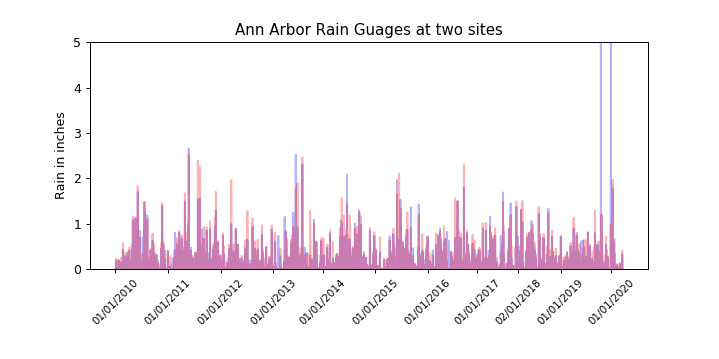

(0, 5)

In [3]:
"""
Let's plot the merged dataset.
"""

%matplotlib notebook

fig = plt.figure(figsize=(8,4))

plt.plot(df_merge['Reading Date'], df_merge['Rainfall (in.)_bp'], alpha=0.3, color='b')
plt.plot(df_merge['Reading Date'], df_merge['Rainfall (in.)_jr'], alpha=0.3, color='r')
plt.xticks(['01/01/2010', '01/01/2011', '01/01/2012', '01/01/2013',
           '01/01/2014', '01/01/2015', '01/01/2016', '01/01/2017',
           '02/01/2018', '01/01/2019', '01/01/2020'], rotation=45, fontsize='small')
plt.subplots_adjust(bottom=0.25)
plt.title('Ann Arbor Rain Guages at two sites')
plt.ylabel('Rain in inches')
plt.ylim([0,5])

<IPython.core.display.Javascript object>


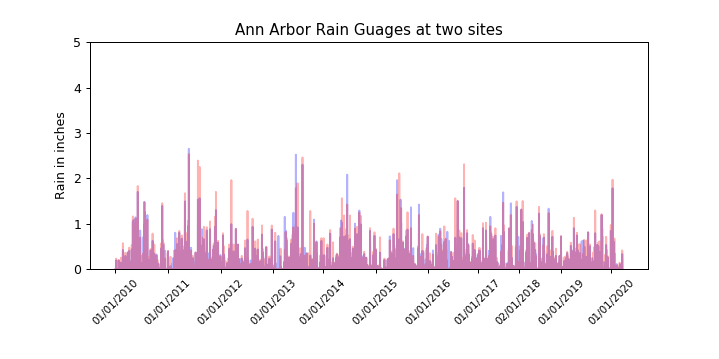

(0, 5)

In [4]:
"""
They seem to overlap quite well, except the Barton Pond dataset has
a couple of values that don't make sense.  These are likely outliers
and need to be removed.
"""

df_merge = df_merge[df_merge['Rainfall (in.)_bp'] < 5].copy()

fig = plt.figure(figsize=(8,4))

plt.plot(df_merge['Reading Date'], df_merge['Rainfall (in.)_bp'], alpha=0.3, color='b')
plt.plot(df_merge['Reading Date'], df_merge['Rainfall (in.)_jr'], alpha=0.3, color='r')
plt.xticks(['01/01/2010', '01/01/2011', '01/01/2012', '01/01/2013',
           '01/01/2014', '01/01/2015', '01/01/2016', '01/01/2017',
           '02/01/2018', '01/01/2019', '01/01/2020'], rotation=45, fontsize='small')
plt.subplots_adjust(bottom=0.25)
plt.title('Ann Arbor Rain Guages at two sites')
plt.ylabel('Rain in inches')
plt.ylim([0,5])

In [5]:
"""
Correlation
"""

df_merge['Rainfall (in.)_bp'].corr(df_merge['Rainfall (in.)_jr'])

# High correlation indicates we can trust the readings of the gauges.

0.9277930602116633

In [6]:
"""
Calculate the differences between the two rain gauges and find the
average and the standard deviation of the differences.
"""

diffs = df_merge.apply(lambda x: x[1] - x[2], axis='columns')
avg = diffs.mean()
sd = diffs.std()
print(avg, sd)

"""
Mean of the differences is very small, as is standard deviation,
indicating, again, that the two rain gauges are reporting accurately.
"""

-0.009186806937731022 0.0897282496165488


'\nMean of the differences is very small, as is standard deviation,\nindicating, again, that the two rain gauges are reporting accurately.\n'

<IPython.core.display.Javascript object>


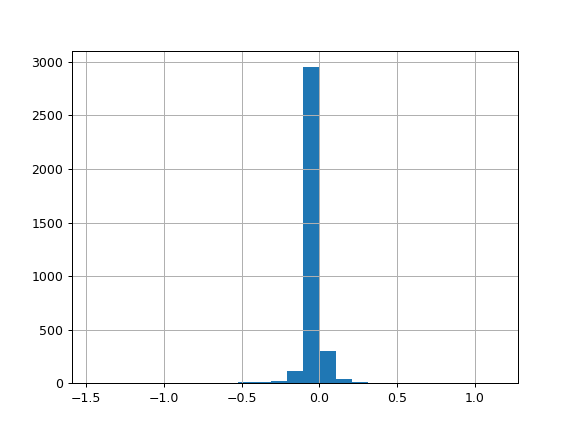

In [7]:
"""
Histogram of the differences.  Looks good.
"""

fig = plt.figure()

diffs.hist(bins=25)

In [8]:
"""
Use the Barton Pond gauge and use it to compare rainfall for all
of Michigan.  The Michigan dataset is split between regions, so
they should be averaged for each month.
"""

df_mi = pd.read_csv('MichiganRainData.csv')
df_mi.head(10)

,ID,Region,State,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,94849,ALPENA,MI 30,1.66,1.32,1.86,2.39,2.67,2.62,3.03,3.23,2.92,2.61,2.10,1.75,28.16
1,14822,DETROIT,MI 30,1.40,1.70,2.02,2.78,3.07,3.25,3.03,3.16,3.39,2.72,2.84,1.97,31.33
2,14826,FLINT,MI 30,1.63,1.48,1.91,2.89,3.08,3.07,3.32,3.18,3.75,2.47,2.67,1.92,31.37
3,94860,GRAND RAPIDS,MI 30,2.09,1.79,2.37,3.35,3.98,3.77,3.78,3.59,4.28,3.26,3.51,2.50,38.27
4,94814,HOUGHTON LAKE,MI 30,1.51,1.21,1.84,2.48,2.82,3.10,2.76,3.40,3.10,2.56,2.32,1.65,28.75
5,14836,LANSING,MI 30,1.65,1.47,2.06,3.03,3.36,3.45,2.84,3.23,3.50,2.53,2.78,1.87,31.77
6,14838,MARQUETTE,MI 30,1.83,1.31,2.00,2.45,2.53,2.68,2.82,2.63,3.16,3.13,2.62,1.97,29.13
7,14840,MUSKEGON,MI 30,2.03,1.83,2.25,2.91,3.25,2.55,2.37,3.39,3.89,3.11,3.36,2.55,33.49
8,14847,SAULT STE. MARIE,MI 30,2.19,1.34,1.95,2.39,2.57,2.70,2.86,3.17,3.82,3.80,3.37,2.79,32.95


In [9]:
"""
Remove unnecessary columns, get the max and min for each month to get the
range of values in different regions for each month.
"""

mi_avg = df_mi.iloc[:, 3:]
mi_avg = mi_avg.iloc[:, :-1]
mi_max = mi_avg.max()
mi_min = mi_avg.min()

mi = mi_avg.mean()

mi_avg_df = pd.DataFrame(mi)

In [10]:
new_index0 = pd.date_range('2016-01-01', '2016-12-31', freq='WOM-3MON')
mi_avg_df = mi_avg_df.set_index(new_index0)
mi_avg_df

,0
2016-01-18,1.776667
2016-02-15,1.494444
2016-03-21,2.028889
2016-04-18,2.741111
2016-05-16,3.036667
2016-06-20,3.021111
2016-07-18,2.978889
2016-08-15,3.220000
2016-09-19,3.534444
2016-10-17,2.910000


In [11]:
"""
Similarly, the data for the Barton Pond data has to be grouped into
months and days before it can be used for graphing.
"""

df_merge['Day'] = df_merge['Reading Date'].str.slice(3,5)
df_merge['Month'] = df_merge['Reading Date'].str.slice(0,2)
grouping = df_merge.groupby(['Month', 'Day'])
grouping_rain = grouping['Rainfall (in.)_bp'].mean()
grouping_rain.head()

Month  Day
01     01     0.042
       02     0.033
       03     0.052
       04     0.003
       05     0.038
Name: Rainfall (in.)_bp, dtype: float64

In [12]:
new_index = pd.date_range('2016-01-01', '2016-12-31', freq='D')
grouping_rain_df = pd.DataFrame(grouping_rain)
grouping_rain_df = grouping_rain_df.set_index(new_index)
grouping_rain_df

,Rainfall (in.)_bp
2016-01-01,0.042000
2016-01-02,0.033000
2016-01-03,0.052000
2016-01-04,0.003000
2016-01-05,0.038000
...,...
2016-12-27,0.066667
2016-12-28,0.078889
2016-12-29,0.105556
2016-12-30,0.040000


<IPython.core.display.Javascript object>


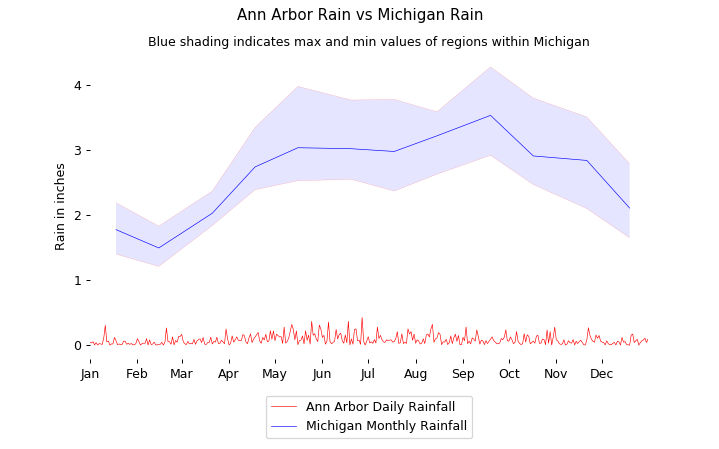

In [13]:
"""
All the data required is ready for plotting.
"""
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

ax = plt.gca()

x_axis = pd.date_range('2016-01-01', '2016-12-31', freq='D')

fig, ax = plt.subplots(figsize=(8,5))
fig.subplots_adjust(bottom=0.2)
formatter = mdates.DateFormatter("%b")
ax.xaxis.set_major_formatter(formatter)

for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.plot(x_axis, grouping_rain_df, 'r-', lw=0.5, label='Ann Arbor Daily Rainfall')
plt.plot(mi_avg_df.index, mi_avg_df, 'b-', lw=0.5, label='Michigan Monthly Rainfall')
plt.plot(mi_avg_df.index, mi_max, 'r-', lw=0.2, alpha=0.4)
plt.plot(mi_avg_df.index, mi_min, 'r-', lw=0.2, alpha=0.4)
ax.fill_between(mi_avg_df.index, mi_min, mi_max, facecolor='blue',
                alpha=0.10)
plt.suptitle('Ann Arbor Rain vs Michigan Rain')
plt.title('Blue shading indicates max and min values of regions within Michigan',
         size=10)
plt.ylabel('Rain in inches')
plt.margins(x=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10))